In [1]:
#basic package
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import pickle
#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

In [3]:
path_extracted_data = config.path_extracted_data
id_run = config.id_run
path_extracted_data_adap = os.path.join(path_extracted_data,'Adaptability')
print(id_run)

ALLDATA_


In [4]:
#download RAW data
#data used in random regression model
df_init = pd.read_csv(os.path.join(path_extracted_data_adap,'df_MVT_4stat_BI.csv'), sep=';')
print(df_init.shape)
display(df_init.head(3))
df_plt_init = df_init[['HenID','Predictability_mean','severity','Feathers','nbr_daysnomvt_over_3days']].drop_duplicates().copy()
print(df_plt_init.shape)
df_plt_init.head(3)

(3230, 31)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,DIB_startat11,avgDIB,severity,Feathers,PC1,nbr_daysnomvt_over_3days,Predictability_mean,Predictability_sd,Variability_mean,Variability_sd
0,hen_134,11,MEXP,pen10,11.500000,1,1112,TRAN,100,0,...,0,22.357143,34,73.0,-1.738433,1,-0.86939,0.097638,0.86939,0.097638
1,hen_134,12,MEXP,pen10,10.166667,0,1112,TRAN,86,0,...,1,22.357143,34,73.0,-1.455477,1,-0.86939,0.097638,0.86939,0.097638
2,hen_134,13,MEXP,pen10,9.000000,0,1112,TRAN,100,0,...,2,22.357143,34,73.0,-1.738433,1,-0.86939,0.097638,0.86939,0.097638


(80, 5)


,HenID,Predictability_mean,severity,Feathers,nbr_daysnomvt_over_3days
0,hen_134,-0.869390,34,73.000000,1
42,hen_138,-0.840499,44,80.000000,0
84,hen_139,-1.078165,30,73.666667,0


# Predict severity with various predictability estimates

In [5]:
#data used in random regression model
df_pred = pd.read_csv(os.path.join(path_extracted_data_adap,'BV_model_severity_pen_pred_PREDALL_predictability.csv'), sep=',')
df_pred = df_pred[(df_pred['time']==0)&(df_pred['nbr_daysnomvt_over_3days']==0)&(df_pred['CLASS']=='LEXP')]
df_pred.rename(columns={'predicted_severity.1':'predicted_severity',
                  'predicted_severity.2':'predicted_severity_lb',
                   'predicted_severity.3':'predicted_severity_ub'}, inplace=True)
print(df_pred.shape)
display(df_pred.head(3))

(12800, 19)


,Unnamed: 0,severity,nbr_daysnomvt_over_3days,Predictability_mean,PC1,PenID,HenID,time,time2,temperature_C_avg_scale,InitialWeight_scale,CLASS,Treatment,predicted_PC1.1,predicted_PC1.2,predicted_PC1.3,predicted_severity,predicted_severity_lb,predicted_severity_ub
7680,7681,35.72446,0,-1.695992,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,14.344197,1.668359,28.093122
7682,7683,35.72446,0,-1.570753,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,17.292256,5.973444,29.323381
7684,7685,35.72446,0,-1.445514,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,20.240316,10.237555,30.757858


In [6]:
df_pred[df_pred['predicted_severity'].isnull()]

,Unnamed: 0,severity,nbr_daysnomvt_over_3days,Predictability_mean,PC1,PenID,HenID,time,time2,temperature_C_avg_scale,InitialWeight_scale,CLASS,Treatment,predicted_PC1.1,predicted_PC1.2,predicted_PC1.3,predicted_severity,predicted_severity_lb,predicted_severity_ub


,Predictability_mean,predicted_severity,predicted_severity_ub,predicted_severity_lb
0,-1.695992,18.037157,31.894930,5.387066
1,-1.570753,20.985216,32.447132,9.103037
2,-1.445514,23.933275,34.128475,13.780195


C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


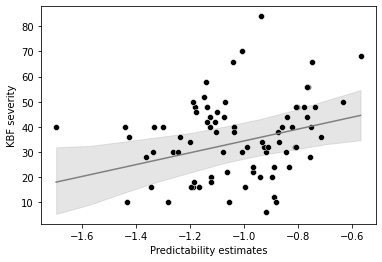

In [7]:
df_plt = df_pred.copy()
df_plt = df_plt.groupby(['Predictability_mean'])[['predicted_severity','predicted_severity_ub',
                                                  'predicted_severity_lb']].mean().reset_index()
display(df_plt.head(3))
#sns.relplot(data=df_plt,x='Predictability_mean', y='predicted_severity.fit', kind='line');
sns.lineplot(data=df_plt,x='Predictability_mean', y='predicted_severity', color='grey');
plt.fill_between(df_plt['Predictability_mean'], df_plt['predicted_severity_lb'], df_plt['predicted_severity_ub'], 
                 color='gray', alpha=0.2)
sns.scatterplot('Predictability_mean', 'severity', data=df_plt_init, color='black');
plt.ylabel('KBF severity')
plt.xlabel('Predictability estimates');
plt.savefig(os.path.join(path_extracted_data_adap,'SeverityPrediction_Predictability.png'), bbox_inches='tight')

# Predict severity with various #days no mvt

In [8]:
#data used in random regression model
df_nbrdays = pd.read_csv(os.path.join(path_extracted_data_adap,'BV_model_severity_pen_pred_PREDALL_nbrfirstdays.csv'), sep=',')
df_nbrdays = df_nbrdays[(df_nbrdays['time']==0)&(df_nbrdays['Predictability_mean']!=0.1111)&(df_nbrdays['CLASS']=='LEXP')]
df_nbrdays.rename(columns={'predicted_severity.1':'predicted_severity',
                  'predicted_severity.2':'predicted_severity_lb',
                   'predicted_severity.3':'predicted_severity_ub'}, inplace=True)
print(df_nbrdays.shape)
display(df_nbrdays.head(3))

(5120, 19)


,Unnamed: 0,severity,nbr_daysnomvt_over_3days,Predictability_mean,PC1,PenID,HenID,time,time2,temperature_C_avg_scale,InitialWeight_scale,CLASS,Treatment,predicted_PC1.1,predicted_PC1.2,predicted_PC1.3,predicted_severity,predicted_severity_lb,predicted_severity_ub
3076,3077,35.72446,0,-1.027512,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,30.07988,22.90309,37.39858
3077,3078,35.72446,1,-1.027512,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,35.19785,28.36680,42.48275
3078,3079,35.72446,2,-1.027512,0.155438,pen10,hen_134,0.0,0.0,0.050856,-0.079213,LEXP,TRAN,-0.658909,-0.951289,-0.373099,40.31581,31.79399,49.35760


In [9]:
df_nbrdays[df_nbrdays['predicted_severity'].isnull()]

,Unnamed: 0,severity,nbr_daysnomvt_over_3days,Predictability_mean,PC1,PenID,HenID,time,time2,temperature_C_avg_scale,InitialWeight_scale,CLASS,Treatment,predicted_PC1.1,predicted_PC1.2,predicted_PC1.3,predicted_severity,predicted_severity_lb,predicted_severity_ub


,nbr_daysnomvt_over_3days,predicted_severity,predicted_severity_ub,predicted_severity_lb
0,0,33.772843,41.107910,26.826620
1,1,38.890810,45.953020,32.222147
2,2,44.008770,52.517075,35.595427


C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


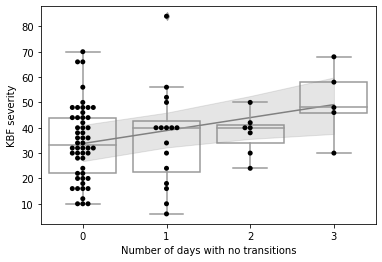

In [10]:
df_plt = df_nbrdays.copy()
df_plt = df_plt.groupby(['nbr_daysnomvt_over_3days'])[['predicted_severity','predicted_severity_ub',
                                                  'predicted_severity_lb']].mean().reset_index()
display(df_plt.head(3))
#sns.relplot(data=df_plt,x='Predictability_mean', y='predicted_severity.fit', kind='line');
sns.lineplot(data=df_plt,x='nbr_daysnomvt_over_3days', y='predicted_severity', color='grey');
plt.fill_between(df_plt['nbr_daysnomvt_over_3days'], df_plt['predicted_severity_lb'], df_plt['predicted_severity_ub'], 
                 color='gray', alpha=0.2)
sns.boxplot('nbr_daysnomvt_over_3days','severity', data=df_plt_init, color='white');
sns.swarmplot('nbr_daysnomvt_over_3days', 'severity', data=df_plt_init, color='black');
plt.ylabel('KBF severity')
plt.xlabel('Number of days with no transitions');
plt.savefig(os.path.join(path_extracted_data_adap,'SeverityPrediction_nbrdays.png'), bbox_inches='tight')